# ASSIGNMENT 2
-----------------------

In [87]:
import numpy as np
import random
import matplotlib.pyplot as plt

## QUESTION 1
--------------

### a)

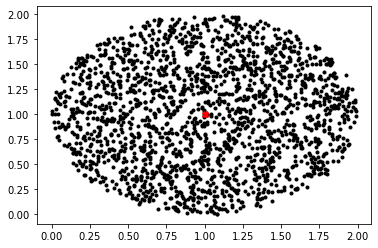

In [88]:
# Circle with radius R = 1 and the mid point is (1,1)
R = 1
x_mid = 1
y_mid = 1

# Let's implement this using the rejection method by thinking of the circle
# being enveloped by a square. So the sides of squares are of length k = 2.

k = 2
n = 2000
seed = 17092020

def is_not_in_circle(x, y):
    d = np.sqrt((x - x_mid)**2 + (y - y_mid)**2)
    if d > R:
        return True
    else:
        return False
    
x = np.zeros((n, 1))
y = np.zeros((n, 1))
for i in range(n):
    # x_i and y_i come from uniform distribution with values ranging between [0,2]
    x[i] = random.random() * k
    y[i] = random.random() * k
    while is_not_in_circle(x[i], y[i]):
        x[i] = random.random() * k
        y[i] = random.random() * k
    
    
plt.plot(x, y, 'k.')
# the middle point of the circle.
plt.plot(x_mid, y_mid, 'rX')

The points are pretty much evenly distributed within the circle.

### b)

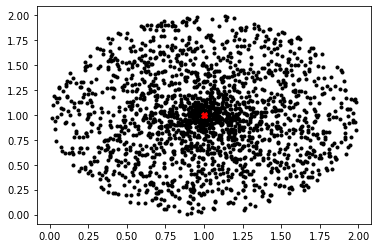

In [89]:
# Circle with radius R = 1 and the mid point is (1,1)
R = 1
x_mid = 1
y_mid = 1

# This time no rejections allowed.
k = 2
n = 2000
seed = 17092020

x = np.zeros((n, 1))
y = np.zeros((n, 1))
for i in range(n):
    # r and theta come from uniform distribution with values ranging between [0,1]
    r = random.random()
    theta = random.random()
    # Generating the points for a circle with middle point (1,1)
    x[i] = r * np.cos(2*np.pi*theta) + x_mid
    y[i] = r * np.sin(2*np.pi*theta) + y_mid
    
plt.plot(x, y, 'k.')
# the middle point of the circle.
plt.plot(x_mid, y_mid, 'rX')

Now, the points are distributed more densly towards the middle point of the circle.

### c)

#### The inverse distribution method

Compute normalization constant C

PDF:
$$p(r) = C2\pi r$$

->

$$F(r\leq R) = \int_0^1 p(r) dr = 1$$
$$C2\pi \int_0^1 r dr = 1$$
$$C2\pi \dfrac{1}{2} = 1$$
$$C\pi = 1$$
$$C = \dfrac{1}{\pi}$$

->

PDF is now of form

$$p(r) = 2r$$

Find the inverse of CDF

CDF:

$$F(r) = \int_0^r p(r') dr'=2 \int_0^r r' dr'=r^2$$

Inverse of CDF:

$$F^{-1}(u) = r = \sqrt{u}$$


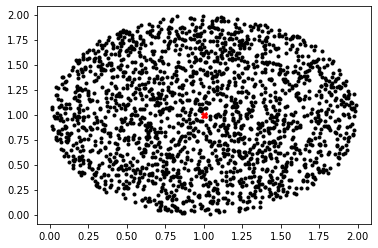

In [90]:
## n = 2000
seed = 17092020


x = np.zeros((n, 1))
y = np.zeros((n, 1))
for i in range(n):
    u = random.random()
    r = np.sqrt(u)
    theta = random.random()
    # Generating the points for a circle with middle point (1,1)
    x[i] = r * np.cos(2*np.pi*theta) + x_mid
    y[i] = r * np.sin(2*np.pi*theta) + y_mid
    
plt.plot(x, y, 'k.')
# the middle point of the circle.
plt.plot(x_mid, y_mid, 'rX')

Compared to the circle that was plotted in part B, we now have a circle that has the points more evenly distributed around the circle radius.

## QUESTION 2
--------------

### a)

$$ f(x) = C Ax^\alpha$$
$$A = 10^4$$
$$\alpha = \dfrac{-3}{2} $$
->
$$ f(x) = 10^4 Cx^{\dfrac{-3}{2}}, x \in [1, 737]$$

Compute normalizing prefactor C

$$ \int_1^{737} p(x') dx'= 1 $$
$$ C = \dfrac{\sqrt{737}}{20000 \left(\sqrt{737}-1 \right) } $$



In [96]:
C = np.sqrt(737) / (20000*(np.sqrt(737)-1))
np.round(C,7)

5.19e-05

CDF:

$$F(x) = \int_1^x p(x') dx'=\int_1^x p(x') dx' = 10000C \left(-\dfrac{2}{\sqrt{x}}+2 \right)$$

### Inverse of CDF / Power-law distribution

$$F^{-1}(u) = x = \left( \dfrac{-2}{\frac{u}{10000C}-2} \right)^2$$

### b)

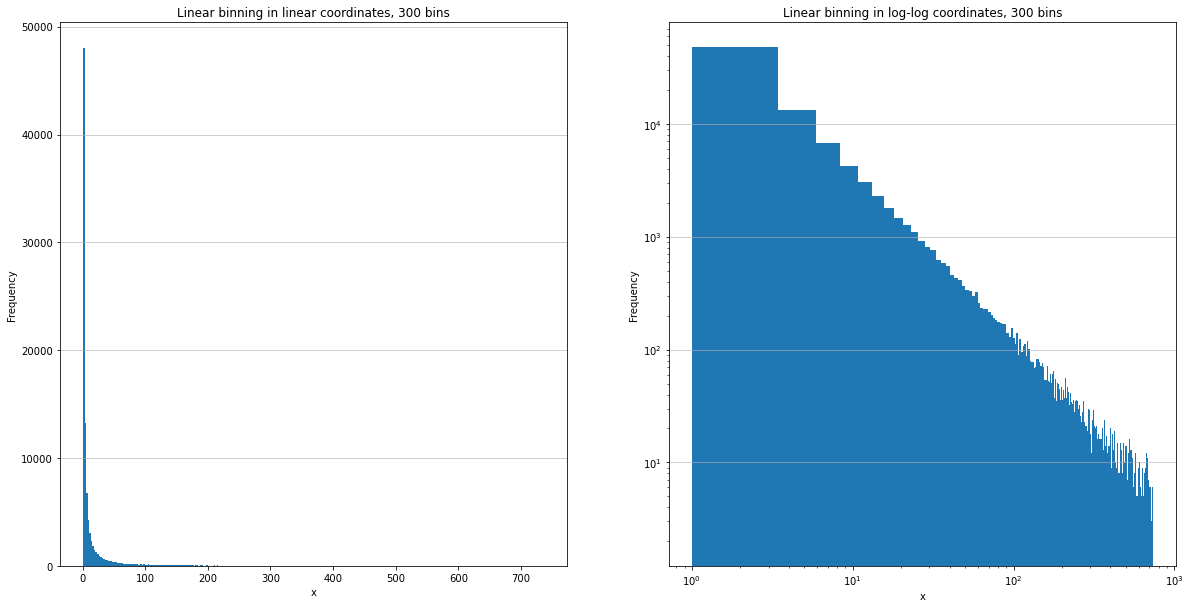

In [92]:
seed = 17092020
n = 100000

data = np.zeros((n, 1))
for i in range(n):
    u = random.random()
    x = 4 / ( ( u / (10000*C) ) - 2)**2
    data[i] = x

bins = 300

fig = plt.figure(figsize=(20,10))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

# linear scaling
ax1.hist(data, bins)
ax1.grid(axis='y', alpha=0.75)
ax1.set_xlabel('x')
ax1.set_ylabel('Frequency')
ax1.set_title('Linear binning in linear coordinates, {} bins'.format(bins))

# log-log scaling
ax2.hist(data, bins)
ax2.grid(axis='y', alpha=0.75)
ax2.set_yscale("log")
ax2.set_xscale("log")
ax2.set_xlabel('x')
ax2.set_ylabel('Frequency')
ax2.set_title('Linear binning in log-log coordinates, {} bins'.format(bins))

plt.show()

### c)

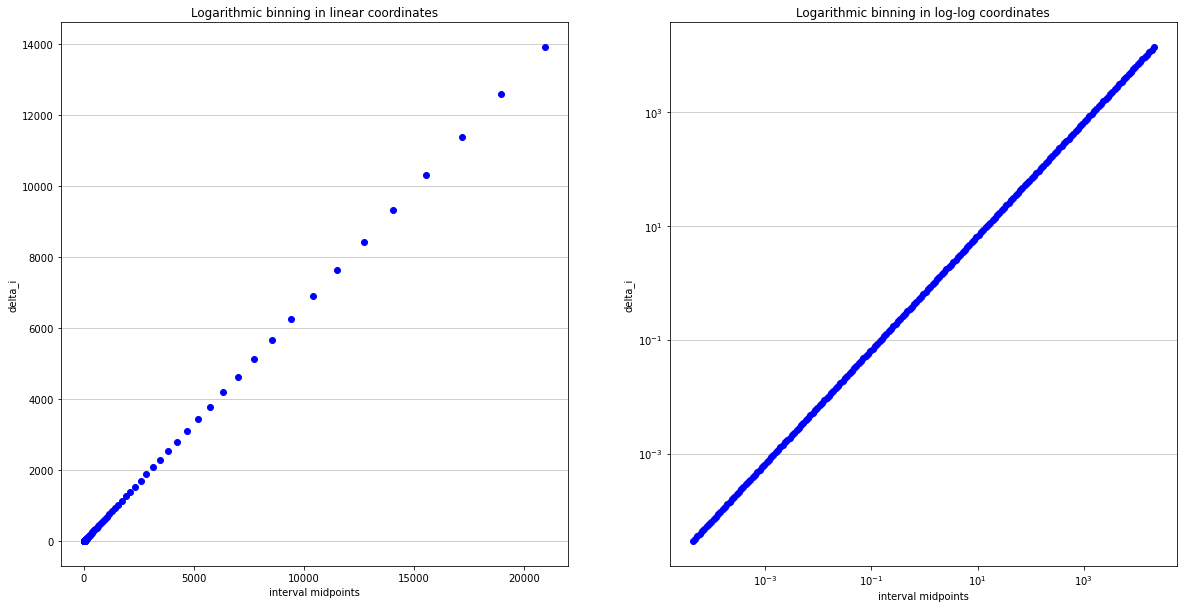

In [93]:
R = 100
r = 10
n = 2*R + 1 

x = np.zeros((n, 1))
y = np.zeros((n, 1))
index = 0
for i in np.arange(-R, R + 1):
    delta_i = (np.exp(i/r) -  np.exp((i-r)/r))
    x[index] = (np.exp((i-1)/r) + np.exp(i/r)) / 2
    y[index] = delta_i
    index += 1


fig = plt.figure(figsize=(20,10))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

# linear scaling
ax1.plot(x, y, 'bo')
ax1.grid(axis='y', alpha=0.75)
ax1.set_xlabel('interval midpoints')
ax1.set_ylabel('delta_i')
ax1.set_title('Logarithmic binning in linear coordinates')

# log-log scaling
ax2.plot(x, y, 'bo')
ax2.grid(axis='y', alpha=0.75)
ax2.set_yscale("log")
ax2.set_xscale('log')
ax2.set_xlabel('interval midpoints')
ax2.set_ylabel('delta_i')
ax2.set_title('Logarithmic binning in log-log coordinates')

plt.show()

Logarithmic binning makes it more clear to see the functional dependence of a fat-tailed distribution with smaller values of x.